<a href="https://colab.research.google.com/github/mbrady4/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/module1-afirstlookatdata/LS_DS_111_A_First_Look_at_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting a Cereal's Rating Based on Nutritional Information



In this analysis, I sought to determine what factors contribute to a cereal's rating (i.e. as determined by Consumer Reports). To inform the analysis I used a dataset containing nutritional information about 77 cereals. I quickly determined that **there is an inverse relationship between the number of calories per serving and a cereal's rating. **

As a next step, I attempted to build a model to predict a cereal's rating. Unfortunately, partly due to the small dataset, **the logistic regression model was unable to converge upon a solution that produces sufficiently accurate predictions** on non-training data. 

Regardless, I was able to build a **functioning logistic regression model that can make ratings predictions** based on nutritional information. At the end of the article, I discuss a few potential routes to increasing the accuracy of the model. 

## Differentiating Between Logistic and Linear Regressions

One topic that has confused me is drawing a clear distinction between linear and logistic regressions. The distinction is as follows ([source](https://stackoverflow.com/questions/12146914/what-is-the-difference-between-linear-regression-and-logistic-regression)): 

**Linear Regression:**
*   The outcome is continuous (e.g., the outcome can be any one of an infinite number of possible values).
*   Used when the target variable is continous (e.g., weight, time)

**Logistic Regression:**
*   The outcome has only a limited number of possible values
*    Used when the response variable is categorical in nature (e.g., binary, red/green/blue, etc.)

![alt text](https://i.stack.imgur.com/rhVmk.jpg)

## 1. Importing and Cleaning the Data

In [2]:
#import standard libraries that will be used throughout the analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import a small (77 examples) data set about cereal brands using ".read_csv". Dataset is from Kaggle.
df = pd.read_csv("https://storage.googleapis.com/kaggle-datasets/2021/5514/cereal.csv?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1553198506&Signature=qEOyZxLXk%2BeKwHM3%2FHgCZ1N%2Bc7NI29hWBqMPJ5rMWHey2xpL9o2Ggq1Ymf4pkgWT%2Fxbg8OaZ%2FM55I3HH0Z%2FqOq8Xbr6CPPid%2FCeuAfgiPHVKj3it4OK8p17d5SXT%2BVXYdC7u%2FuEhQEsY64XUlesCgWAqYTy5mGFS0LRAZ%2Bc3MLemYenfA7Ub19kAciCdu96vZahAGk%2BAeVpL8H3pTwGsi%2Fb5MZ7PU4E12ijoAAYsa9qeFfTj%2FipSrUZe3VFTxMbEaxvivsw2VMaCpmGrpxXxALPVNh1jP3aGxF%2FesMdDDvLbVqB54ti3b5qoHbWhDUbJDB%2Bbh1tr6Aa1HpTzOkgR6w%3D%3D")

#Verify that data imported correctly
df.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


In [0]:
#Create copy of data as backup to avoid working directly with the original dataset (not strictly necessary in this setup)
df2 = df.copy()

In [4]:
#Verify that the data copied correctly into the "df2" dataframe. 
df2.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


In [5]:
#Check to see if the data requires cleaning (e.g., missing values, non-float values)
df2.describe()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,106.883117,2.545455,1.012987,159.675325,2.151948,14.597403,6.922078,96.077922,28.246753,2.207792,1.029610,0.821039,42.665705
std,19.484119,1.094790,1.006473,83.832295,2.383364,4.278956,4.444885,71.286813,22.342523,0.832524,0.150477,0.232716,14.047289
min,50.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,1.000000,0.500000,0.250000,18.042851
25%,100.000000,2.000000,0.000000,130.000000,1.000000,12.000000,3.000000,40.000000,25.000000,1.000000,1.000000,0.670000,33.174094
50%,110.000000,3.000000,1.000000,180.000000,2.000000,14.000000,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.400208
75%,110.000000,3.000000,2.000000,210.000000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,50.828392
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,3.000000,1.500000,1.500000,93.704912


# 2. Understanding the relationship between Calories and Rating
My intial hypothesis was the the calories per serving would be an important variable that a cereal's rating would depend upon. To begin to understand the range of values within the "calories" column, we can create a simple histogram. 




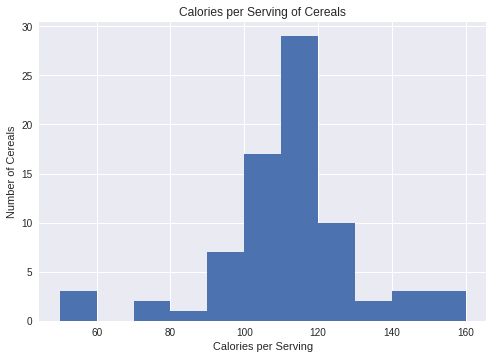

In [6]:
#Create a basic histogram to directionally understand the distribution of calories per serving.
plt.title('Calories per Serving of Cereals')
plt.xlabel('Calories per Serving')
plt.ylabel('Number of Cereals')

# Bin size set to create even bins across full range of calorie values. 
plt.hist(df2['calories'], bins=range(50, 160+10, 10)); 

The distribution appears to be relatively evenly distributed with most of the cereals containing 90 - 130 calories per serving. 

Our next step, is to view a scatterplot to determine if there is a relationship between calorie content and the rating of a respective cereal. 

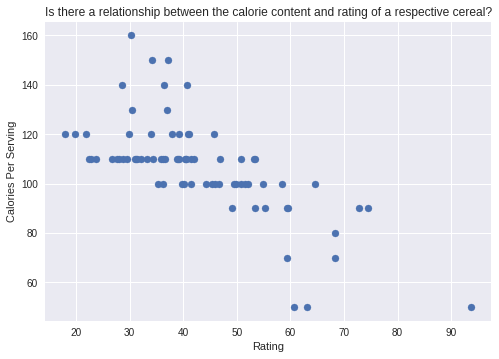

In [7]:
#Create a scatterplot to show relationship between calories per serving and rating. 

plt.title('Is there a relationship between the calorie content and rating of a respective cereal?')
plt.xlabel('Rating')
plt.ylabel('Calories Per Serving')
plt.scatter(df2['rating'],df2['calories']);

Note, that this plot shows a clear inverse relationship between calories per serving and rating. Thus, a preliminary concolusion is that to maximize a cereal's rating, a manufacturer should seek to minimize the number of calories per serving. 

One caveat in this analysis is found in the "weight" and "cups" columns. As evident in the above 'df2.head( )' views, every cereal in the dataset has the same weight attribute; however, the cup size varies substantially. This implies to compare the cereals nutritional content, weight was equalized, not cups. 

# 3. Predicting a Cereal's Rating Based on its Nutritional Content




The first step is to convert the 'rating' column from floats to ints. This is necessary because, a logistic regression model cannot accept float values as the label/target (value we are trying to predict). As you can see in the below table, our ratings our now expressed as ints rather than floats.

In [8]:
df2['rating'] = df2['rating'].astype(int)
df2.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34


Now we are ready to begin building a logistic regression model. The first step is to divide our dataset into a training and a test set. To do so we will use the 'train_test_split' function from sklearn. 

In [9]:
#Create a training and test data set from the imported Cereal data set
from sklearn.model_selection import train_test_split

train, test = train_test_split(df2, random_state=0)
train.shape, test.shape

((57, 16), (20, 16))

To build our logistic regression model, we need to import a few additional functions from sklearn and define our features (independent variables) and target (dependent variable; what we are trying to predict). 

In addition, we will test the accuracy of our model on both the training and test data sets. 

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

features = ['calories', 'protein', 'fat', 'sodium', 'fiber', 'carbo', 'sugars', 'potass', 'vitamins', 'cups']
target = 'rating'

model = LogisticRegression(solver='lbfgs', multi_class='auto', max_iter=1000)
model.fit(train[features], train[target])

#Train Accuracy 
y_true = train[target]
y_pred = model.predict(train[features])
print('Train accuracy:', accuracy_score(y_true, y_pred))

#Test Accuracy
y_true = test[target]
y_pred = model.predict(test[features])
print('Test Accuracy:', accuracy_score(y_true, y_pred))

Train accuracy: 0.9298245614035088
Test Accuracy: 0.05


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


Note that the train accuracy is relatively high (0.929), but the Test accuracy is close to zero (0.05). In a useful model, we would want to see much less dropoff between the train and test accuracy scores.  

The 'LogisticRegression' function is set to iterate a maximum of 1000 times while attempting to converge, but that still allows for each example (cereal) to be iterated over ~20 times. This dynamic partly explains why the logistic regression approach was able to generate a realtively high train accuracy score while failing to converge and producing a test accuracy score close to zero. 

Although not likely to be accurate, we can use the logistic regression model to predict a new cereal's rating quite easily. To do so, we simply generate an array with hypothetical values for each feature. As you can see below, based on our new cereal's nutritional information the model predict's that the cereal's rating will be 52. 

In [0]:
#Predict the rating of a new cereal
features = [[106, 3, 1, 84, 2, 14, 7, 96, 28, 1]]
prediction = model.predict(np.asarray(features)) 
print('Predicted Rating: ' + str(prediction))

# Key Learnings

In this analysis, a number of useful basic skills/approaches were demosntrated that will be relevant to other data science work. These include: 
Learned how to import datasets from Kaggle. I also was reminded that **it is not possible to run logistic regressions with continuous labels. **

*   **Importing Data:** Specifically from Kaggle.
*  ** Preparing Data for a logistic regression: **Converting continuous labels (floats) to discrete labels (ints)
*   **Studying the model's performance across test and train data:** As demosntrated by the gap between our train and test accuracy, the model quickly overfits the training data--and is not able to predict ratings for the test data. 

# Next Steps

Partly due to the small size of the dataset the model is not able to converge on a solution. Part of the problem is that I am asking the model to make overly precise predictions given the small dataset. **If I bucketed the "rating" column into fewer groups, the model may be able to converge on a solution with predictive ability beyond the training set. **

There is also a clear opportunity to test different model types and alter the mix of features used as inputs to the model. 
